# Data and Sampling Distribution

Note: In general Data Scientist need not worry about the theoretical nature of a population and instead should focus on the sampling procedures and the data at hand. There are some notable exceptions: data that is generated from physical processes can be modeled. For example a coin flip: this follows a binomial distribution. Any real-life binomial situation(buy or don't buy, fraud or no fraud, click or don't click) can be modeled effectively by a coin(with modified probability of landing heads).

## Content
- **Random Sampling and Sample Bias**
- **Selection Bias**
- **Sampling Distribution of a Statistic**
    - Plotting histogram of annual income of loan applicants, mean of 5 applicants, mean of 20 applicants
- **The Bootstrap**
    - Compute boostrap statistics (bias and standard deviation)
- **Confidence Intervals**
- **Normal Distribution**
    - Plotting QQ-Plot of a sample of 100 values drawn from a standard normal distribution
- **Long-Tailed Distribution**
    - Plotting QQ-Plot of the returns for Netflix(NFLX)
- **Student's t-Distribution**
- **Binomial Distribution**
    - Compute binomial PMF and CDF of observing 0 sales in 200 clicks with p = .02
- **Chi-Square Distribution**
- **F-Distribution**
- **Poisson and Related Distributions**
    - Simulationg and plotting poisson distribution
    - Simulationg and plotting exponential distribution
    - Simulationg and plotting weibull distribution



In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import matplotlib.pyplot as plt

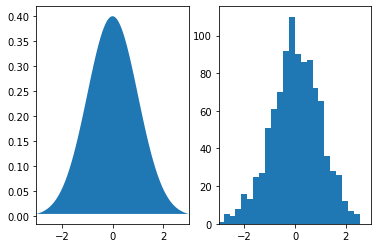

In [16]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2)

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_xlim(-3, 3)
ax.set_position

plt.show()

## Random Sampling and Sample Bias

Important key terms: 
- **Sample**
- **Population**
- **N(n)**
- **Random and stratisfied sampling**
- **Stratum**
- **Simple random sample**
- **Bias**
- **Sample bias**

Data quality is often greater than data quantity when making estimates or models based on a sample. In data science this means **completeness, consistency of format, cleaniness, and accuracy of data points**. Statistics add the notion of **representativeness**. 

Classic example: Literary Digest poll of 1963 that predicted a victory of Alf Landon over Franklin Roosevelt: they polled the subscribers plus additional lists of people, totaling 10 million people. George Gallup biweekly polls of just 2000 people and accuratly predicted a Roosevelt victory. 

The Literary Digest opted for quantity, paying little attention to the method of selection. They ended up polling those with relatively high socioeconomic status (their own subscribers, plus those who, by virtue of owning luxuries like telephones and automobiles, appeared in marketers’ lists). The result was *sample bias*; that is, the sample was different in some meaningful and *nonrandom* way from the larger population it was meant to represent.

To avoid the problem of sample bias that led the Literary Digest to predict Landon over Roosevelt, George Gallup opted for more scientifically chosen methods to achieve a sample that was representative of the US voting electorate. There are now a variety of methods to achieve representativeness, but at the heart of all of them lies random sampling.

### Size Versus Quality: When Does Size Matter?

A classic scenario when size matter is when the data is not only big but sparse as well. For example search queries recieved by Google. There are over 150,000 words and Google processes trillions of queries a day, leading to a matrices mostly made of zeros.

### Sample Mean Versus Population Mean

The symbol $\bar{x}$ (pronounced “x-bar”) is used to represent the mean of a sample from a population, whereas $\mu$ is used to represent the mean of a population. Why make the distinction? Information about samples is observed, and information about large populations is often inferred from smaller samples. Statisticians like to keep the two things separate in the symbology.

## Selection Bias

Important key terms: 
- **Selection bias**(cherry picking, time intervals, stopping experiments, regression to the mean)
- **Data snooping** (tossing coin 10 times vs. 20 people tossing coin 10 times)
- **Vast search effect**
- **Regression to the Mean** (e.g. “rookie of the year, sophomore slump” phenomenon, skill and luck then no luck only skill)

In data science, selection bias is something to worry about when you repeatly review a large data set. Using a holdout set or more than one to validate performance. Also, the use of what we calls *target shuffling* (a permutation test, in essence) to test the validity of predictive associations that a data mining model suggests.

## Sampling Distribution of a Statistic
Important key terms: 
- **Sample statistic**
- **Data and sample distribution**
- **Central limit theorem**
- **Standard error**(variability of a sample statistic over many samples)

Typically, a sample is drawn with the goal of measuring something (with a *sample statistic*) or modeling something (with a statistical or machine learning model). Since our estimate or model is based on a sample, it might be in error; it might be different if we were to draw a different sample. We are therefore interested in how different it might be—a key concern is *sampling variability*. If we had lots of data, we could draw additional samples and observe the distribution of a sample statistic directly.

Typically, we will calculate our estimate or model using as much data as is easily available, so the option of drawing additional samples from the population is not readily available.

**Note:** 

The distribution of a sample statistic such as the mean is likely to be more regular and bell shaped than the distribution of the data itself.

In [17]:
DATA = 'data/'
LOANS_INCOME = DATA + 'loans_income.csv'
SP500 = DATA + 'sp500_data.csv.gz'

### Plotting histogram of annual income of loan applicants, mean of 5 applicants, mean of 20 applicants

In [18]:
loans = pd.read_csv(LOANS_INCOME).squeeze('columns')
loans.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [19]:
sample_loans = pd.DataFrame({
    'income': loans.sample(1000),
    'type': 'Data',
})
sample_loans_5 = pd.DataFrame({
    'income': [loans.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})
sample_loans_20 = pd.DataFrame({
    'income': [loans.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_loans, sample_loans_5, sample_loans_20])
results.head()

,income,type
40292,63000.0,Data
38959,92000.0,Data
17361,134000.0,Data
33996,52000.0,Data
26491,43000.0,Data


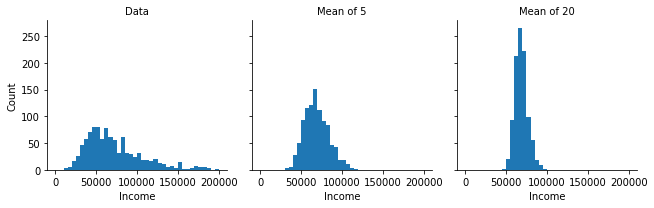

In [20]:
g = sns.FacetGrid(results, col='type')
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

Note that frequency distributions of a sample statistic tells us how that metric would turn out differently from sample to sample and can be estimated via the boostrap, or via formulas that rely on the central limit theorem. A key metric that sums up the variability of a sample statistic is its *standard error*.

##### Note on the standard error on the mean (SEM) 

The SEM may be derived from the variance of a sum of independent random variables based on the standard deviation s of the sample values, and the sample size n:

$$
\text{Standard error} = SE = \frac{s}{\sqrt{n}}
$$

for derivation see [standard error](https://en.wikipedia.org/wiki/Standard_error)

In modern statistics, the *bootstrap* has become the standard way to estimate standard error. It can be used for virtually any statistic and does not rely on the central limit theorem or other distributional assumptions.

## The Bootstrap

Conceptually, you can imagine the bootstrap as replicating the original sample thousands or millions of times so that you have a hypothetical population that embodies all the knowledge from your original sample (it’s just larger). You can then draw samples from this hypothetical population for the purpose of estimating a sampling distribution.

Important key terms: 
- **Bootstrap sample**
- **Resampling**

The algorithm for a bootstrap resampling of the mean, for sample size n we have
1. Draw a sample value, record it, and then replace it.
2. Repeat n times
3. Record the mean of the n resampled values
4. Repeat 1-3 R times(R the number of iterations)
5. Use the R results to:
    - Calculate their standard deviation(which is used to estimates sample mean standard error)
    - Produce a histogram or boxplot
    - Find a confidence interval


### Compute boostrap statistics (bias and standard error)

In [21]:
results = []
for iteration in range(1000):
    sample = resample(loans)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print('original: {}'.format(loans.median()))
print('bias: {}'.format(results.mean()-loans.median()))
print('std. err: {}'.format(results.std()))

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. err: 228.73933106830927


The original estimate of the median is 62000 dollars. The bootstrap distribution indicates that the estimate has a bias of about -72 dollars and a standard error of 214 dollars. The results will vary slightly between consecutive runs of the algorithm.

Note: we can run boostrapping on multivariate data. A model might then be run on the bootstrapped data, for example, to estimate the stability(vaiability) of model parameters, or to improve predictive power. With classification and regression trees, running multiple trees on bootstrap samples and then averaging their predictions or with classification, taking the majority vote, generally performs better than using a single tree. This process is called *bagging (bootstrap aggregation)*.

**Caution:**

The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us about how lots of additional samples would behave when drawn from a population like our original sample.

## Confidence Intervals
Important key terms: 
- **Confidence level**
- **Interval endpoints**

A x% confidence interval around a sample estimate should, on average, contian similar sample estimates x% of the time( when a similar sampling procedure is followed). Given a sample size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data(a resample)
2. Record the statistic of interest for the resample
3. Repeat steps 1-2 many(R) times
4. For an x% confidence interval, trim $[(100-x)/2]$% of the R resample results from either end of the distribution
5. The trim points are the endpoints of an x% bootstrap confidence interval.

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. For a Data Scientist the confidence interval is a tool that can be used to get an idea of how variable a sample result might be, most likely to communicate the potential error in an estimate, and perhaps to learn whether a larger sample is needed.

### Bootstrap confidence interval for the annual income of loan applicants, based on a sample of 20

mean:  68760.51844
mean of 20 samples:  55734.1


Text(0, 0.5, 'Counts')

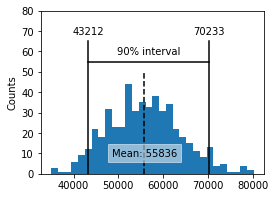

In [25]:
print('mean: ',loans.mean())
np.random.seed(seed=3)  

# create a sample of 20 loan income data
sample20 = resample(loans, n_samples=20, replace=False)
print('mean of 20 samples: ',sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', 
            verticalalignment='center')
    
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()

ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

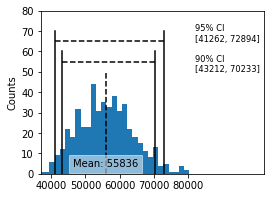

In [27]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

## Normal Distribution
Important key terms:
- **Error**
- **Standardize**
- **z-score**
- **Standard normal**
- **QQ-plot**

Recall the 68,95,99 rule.

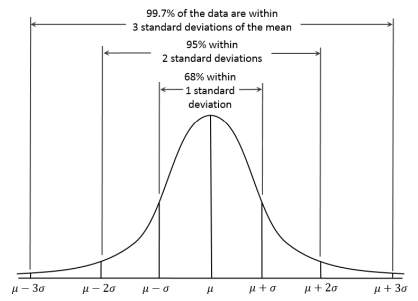

**Note:**

Another name previously used for the normal distribution was the “error” distribution. Statistically speaking, an error is the difference between an actual value and a statistical estimate like the sample mean. For example, the standard deviation is based on the errors from the mean of the data.

### Standard Normal and QQ-Plots

A *QQ-Plot* is used to visually determine how close a sample is to a specified distribution—in this case, the normal distribution. The *QQ-Plot* orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

### Plotting QQ-Plot of a sample of 100 values drawn from a standard normal distribution

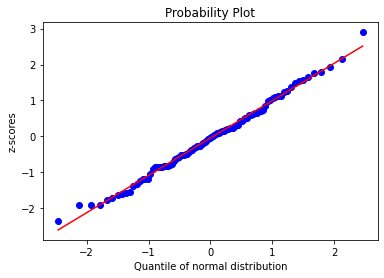

In [32]:
fig, ax = plt.subplots()
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
ax.set_ylabel('z-scores')
ax.set_xlabel('Quantile of normal distribution')
plt.show()

## Long-Tailed Distribution
Important key terms:
- **Tail**
- **Skew**

Note that historically data is generally not normally distributed, which are useful with respect to errors and sample statistics.  Nassim Taleb has proposed the black swan theory, which predicts that anomalous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal
distribution.

In [28]:
sp500 = pd.read_csv(SP500)
sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


### Plotting QQ-Plot of the returns for Netflix(NFLX)

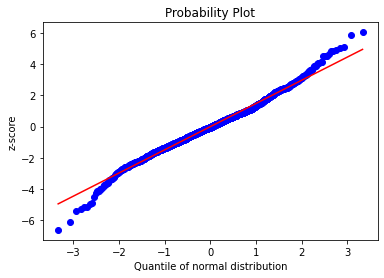

In [34]:
nflx = sp500.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots()
stats.probplot(nflx, plot=ax)
ax.set_xlabel('Quantile of normal distribution')
ax.set_ylabel('z-score')
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

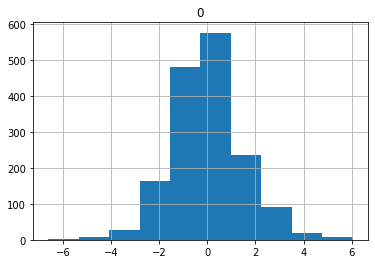

In [37]:
pd.DataFrame(nflx).hist()

**Note:** 
In contrast to normal distribution QQ-Plot the points above are for below the line for low values and far above the line for high values, indicating the data are not normally distributed. This means we are much more likely to observe extreme values than would be expected if the data had a normal distribution.

There is much statistical literature about the task of fitting statistical distributions to observed data. Beware an excessively datacentric approach to this job, which is as much art as science. Data is variable, and often consistent, on its face, with more than one shape and type of distribution. It is typically the case that domain and statistical knowledge must be brought to bear to determine what type of distribution is appropriate to model a given situation. For example, we might have data on the level of internet traffic on a server over many consecutive five-second periods. It is useful to know that the best distribution to model “events per time period” is the Poisson.

## Student's t-Distribution
Important key terms:
- **Degrees of freedom**

**Note:** 

t-distribution is normally shape but is also thicker and longer on the tails. Used a lot in sample statistics, like the sample mean.

Also, t-distribution is used in classical statistical inference but is not central to the purpose of data science. Empirical bootstrap sampling can answer most questions about sampling error. On the other hand, data scientist can encounter t-statistics in output from statitistic software, for example in A/B tests and regressions.

## Binomial Distribution
Important key terms:
- **Trial**
- **Success**
- **Binomial**
- **Binomial trial**
- **Binomial distribution**

Binomial distribution would answer a question like: If the probability of a click converting to a sale is .02, what is the probability of observing 3 sales in 200 clicks? Note that calculating binomial probabilities with large sample sized and probability not too close to 0 or 1 most statistical procedures use the normal distribution with mean and variance, as an approximation.

### Compute binomial PMF and CDF of observing 3 sales in 200 clicks with p = .02

In [38]:
stats.binom.pmf(3, n=200, p=.02)

0.19634683738878655

In [39]:
stats.binom.cdf(3, n=200, p=.02)

0.43149497316145197

## Chi-Square Distribution
Say you want to test whether one variable(say 'gender') is independent of another(say 'was promoted in job') and you have the counts of the number in each of the cells of the data table. The statistic that measures the extent of which results depart from the null expectation of independence is the chi-square statistic. It's the difference between the observed and expected values, divided by the square root of the expected value, squared, then summed across all categories. 

A more general way of putting this is to note that the chi-square statistic is a measure of the extent to which a set of
observed values “fits” a specified distribution (a “goodness-of-fit” test). It is useful for determining whether multiple treatments (an “A/B/C… test”) differ from one another in their effects.

A low chi-square value for a set of counts indicates that they closely follow the expected distribution

## F-Distribution
Much like the chi-square distribution we are dealing with multiple treatments across groups. In this case we are interested in the extent to which differences among group means are greater than we might expect under normal random variation. The F-statistic measures this and is the ratio of the variablility amoung the group  means to the variability within each group. This comparison is termed an analysis of variance (ANOVA). 

The distribution of the F-statistic is the frequency distribution of all the values that would be produced by randomly permuting data in which all the group means are equal (i.e., a null model).

The F-statistic is also used in linear regression to compare the variation accounted for by the regression model to the overall variation in the data.

## Poisson and Related Distributions

Many processes produce events randomly at a given overall rate—visitors arriving at a website, or cars arriving at a toll plaza (events spread over time); imperfections in a square meter of fabric, or typos per 100 lines of code (events spread over space).

Important key terms:
- **Lambda** (the rate)
- **Poisson distribution** (The frequency distribution of the number of events in sampled units of time or space)
- **Exponential distribution** (The frequency distribution of the time or distance from one event to the next event.)
- **Weibull distribution** (A generalized version of the exponential distribution in which the event rate is allowed to shift over time.)

### Simulating and plotting poisson distribution

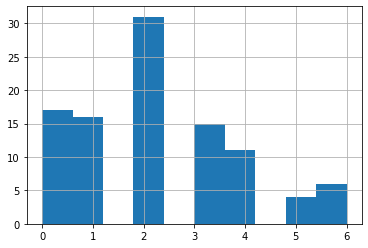

In [13]:
poisson_sample = stats.poisson.rvs(2, size=100)
pd.Series(poisson_sample).hist()
plt.show()

### Simulating and plotting exponential distribution

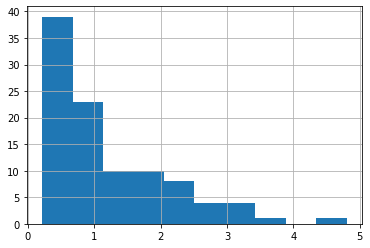

In [14]:
exponential_sample = stats.expon.rvs(.2, size=100)
pd.Series(exponential_sample).hist()
plt.show()

### Simulating and plotting weibull distribution

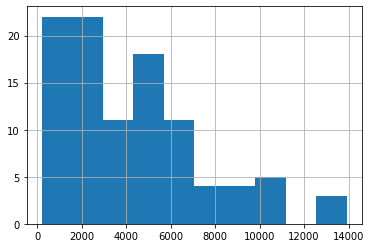

In [15]:
weibull_sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)
pd.Series(weibull_sample).hist()
plt.show()